In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from knn import KNN

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2)

In [4]:
accuracy_results = []
for k in [3,5,7,9,11,13]:
    knn = KNN(k=k)
    knn.fit(X_train,Y_train)
    accuracy = knn.evaluate(X_test,Y_test)
    formatted_accuracy = '{:.2f}%'.format(accuracy*100)
    accuracy_results.append({'k': k, 'accuracy': formatted_accuracy})

results_df = pd.DataFrame(accuracy_results)
results_df.style

,k,accuracy
0,3,96.67%
1,5,96.67%
2,7,96.67%
3,9,96.67%
4,11,96.67%
5,13,96.67%


In [5]:
knn = KNN(3)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 2])

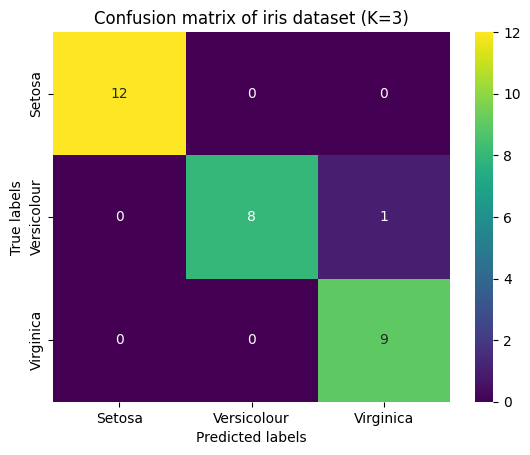

In [6]:
confusion_matrix = metrics.confusion_matrix(np.array(Y_test),y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

ax= plt.subplot()
sb.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax,cmap='viridis')

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Setosa','Versicolour','Virginica']); ax.yaxis.set_ticklabels(['Setosa','Versicolour','Virginica'])
plt.title('Confusion matrix of iris dataset (K=3)')
plt.show()
